In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from fbprophet import Prophet
from pylab import rcParams
rcParams['figure.figsize'] = (22,5)

In [24]:
FILE_PATH = "../dataset/excel_fpt.csv"
test_size = 0.01

In [25]:
df = pd.read_csv(FILE_PATH)
df.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,FPT,20201216,57.2,57.5,57.0,57.1,1995530
1,FPT,20201215,57.5,57.6,56.6,56.7,2666900
2,FPT,20201214,57.0,58.0,56.9,57.2,1443760
3,FPT,20201211,56.6,57.0,56.3,57.0,1750270
4,FPT,20201210,57.0,57.7,56.5,56.5,2112490


In [26]:
columns = df.columns
columns_remove_bracket = [label.replace("<","").replace(">","") for label in columns]
columns_to_replace = {columns[i]: columns_remove_bracket[i] for i in range(len(df.columns))}
df.rename(columns=columns_to_replace, inplace=True)
df.drop(["Ticker","Open","High","Low","Volume"], axis=1, inplace=True)
df["DTYYYYMMDD"] = pd.to_datetime(df["DTYYYYMMDD"], format="%Y%m%d", errors="coerce")
df.rename(columns={"DTYYYYMMDD": "ds", "Close": "y"}, inplace=True)
df.sort_values(by="ds", inplace=True, ascending=True)
df.reset_index(inplace=True, drop=True)
df.head()

,ds,y
0,2006-12-13,22.5807
1,2006-12-14,23.7097
2,2006-12-15,24.8952
3,2006-12-18,26.1372
4,2006-12-19,27.4356


In [27]:
total = len(df)
x_train, x_test = df[:int(total * (1-test_size))], df[int(total * (1-test_size)):]
total, x_train.shape, x_test.shape

(3490, (3455, 2), (35, 2))

In [28]:
model = Prophet(daily_seasonality=False)
model.fit(x_train)

In [29]:
# df_future = model.make_future_dataframe(periods=len(x_test), include_history=False)
df_future = x_test.drop(columns=["y"])
df_future.reset_index(inplace=True, drop=True)
df_future.head()

,ds
0,2020-10-29
1,2020-10-30
2,2020-11-02
3,2020-11-03
4,2020-11-04


In [30]:
forecast = model.predict(df_future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-10-29,49.300876,46.185828,52.158520
1,2020-10-30,49.309416,46.451713,52.171027
2,2020-11-02,49.351882,46.252004,52.355734
3,2020-11-03,49.390407,46.059371,52.509136
4,2020-11-04,49.407168,46.250462,52.269564


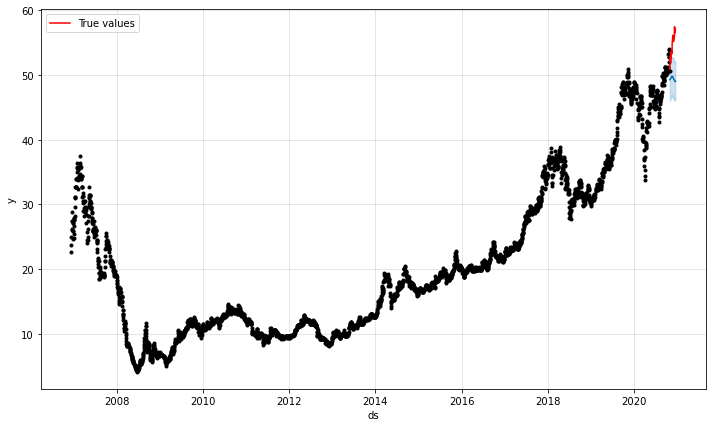

In [31]:
figure_1 = model.plot(forecast)
x_test_clone = x_test.copy()
x_test_clone.set_index("ds", inplace=True)
plt.plot(x_test_clone, color="red", label="True values")
plt.legend()

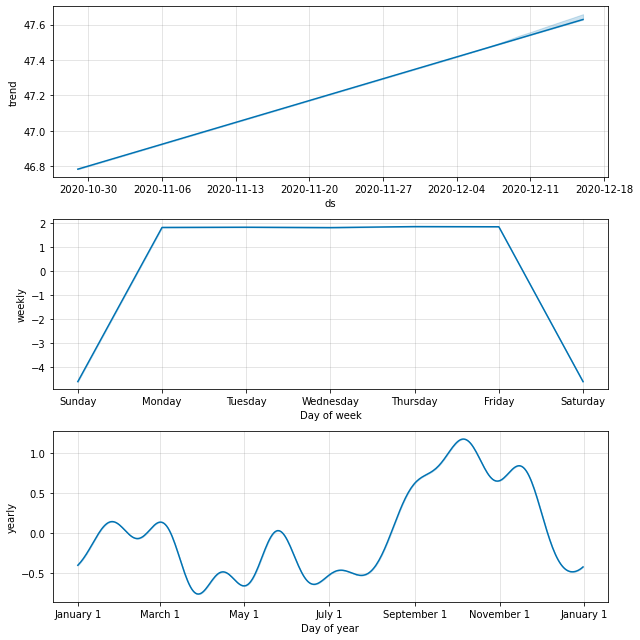

In [32]:
figure_2 = model.plot_components(forecast)